<font color="yellow" size="6">Outliers</font>
<p><font color="GREEN" size="4">3_One-Class SVM</font>

The One-Class SVM (Support Vector Machine) is another useful algorithm for outlier detection. It is an unsupervised method that tries to find a decision function that classifies the majority of the data as "inliers" while considering the remaining points as "outliers."

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize the features (One-Class SVM is sensitive to scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

The nu parameter specifies the upper bound on the fraction of outliers in the data. In this example, we set nu=0.05, meaning we expect up to 5% of the data to be outliers. The kernel='rbf' parameter uses a radial basis function kernel, and gamma='scale' automatically selects the best gamma parameter for the RBF kernel.

In [3]:
# Initialize the One-Class SVM model
# nu represents the upper bound on the fraction of margin errors (outliers)
model = OneClassSVM(nu=0.05, kernel='rbf', gamma='scale')  # nu=0.05 means we're expecting 5% of the data to be outliers


In [4]:
# Fit the model on the data
model.fit(X_scaled)


OneClassSVM(nu=0.05)

In [5]:
# Predict outliers (-1 indicates outliers, 1 indicates inliers)
y_pred = model.predict(X_scaled)

Prediction: The predict() method returns 1 for inliers and -1 for outliers. We use this result to count how many outliers the model detected.

In [6]:
# Outliers are marked as -1, inliers are marked as 1
outliers = y_pred == -1
print(f"Number of outliers detected: {np.sum(outliers)}")

Number of outliers detected: 11


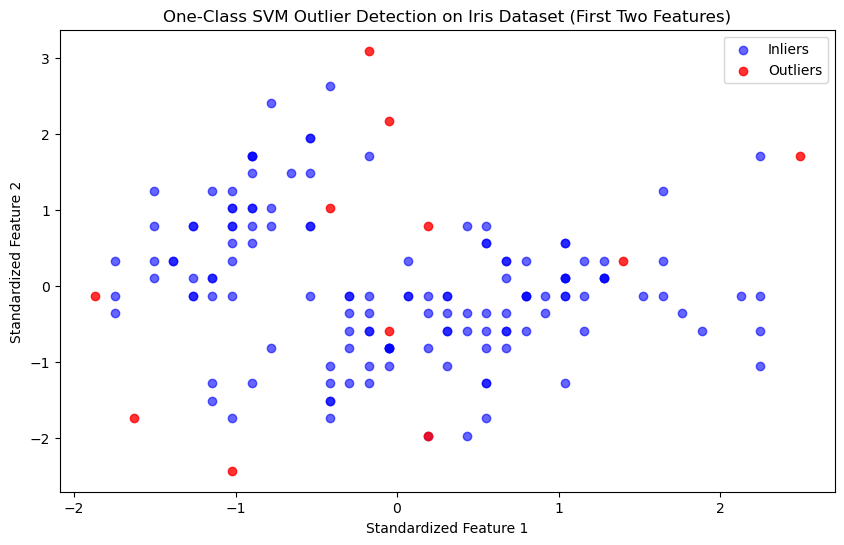

In [7]:
# Visualize the first two features to see how the outliers are detected
plt.figure(figsize=(10, 6))

# Plot inliers (points classified as 1)
plt.scatter(X_scaled[~outliers, 0], X_scaled[~outliers, 1], color='blue', label='Inliers', alpha=0.6)

# Plot outliers (points classified as -1)
plt.scatter(X_scaled[outliers, 0], X_scaled[outliers, 1], color='red', label='Outliers', alpha=0.8)

plt.xlabel('Standardized Feature 1')
plt.ylabel('Standardized Feature 2')
plt.legend()
plt.title('One-Class SVM Outlier Detection on Iris Dataset (First Two Features)')
plt.show()